# MULTIPLE LINEAR REGRESSION - FUEL CONSUMPTION


By Srushti Shimpi

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Reading the data

In [47]:
data = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration


In [48]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Creating new data, including few columns from previous data


In [49]:
rdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
rdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244


# MULTIPLE REGRESSION MODEL 1

### Spliting the data
Here, 80% data is used for training and 20% data for testing. 

In [50]:
split = np.random.rand(len(data)) < 0.8
train = rdf[split]
test = rdf[~split]

### Data Modeling

In this data model, I am using FUEL CONSUMPTION COMBINED FUELCONSUMPTION_COMB column insted of FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY 

In [51]:
reg1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
reg1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', reg1.coef_)
print ('Intercept: ',reg1.intercept_)

Coefficients:  [[10.43766567  7.46140433 10.138382  ]]
Intercept:  [61.40459734]


### Testing the data

In [52]:
y_hat1= reg1.predict(test1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x1 = np.asanyarray(test1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y1 = np.asanyarray(test1[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - test_y1) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg1.score(test_x1, test_y1))

Residual sum of squares: 571.26
Variance score: 0.85


### Calculating the accuracy of the regression model

In [53]:
regr = LinearRegression() 
regr.fit(train_x1, train_y1) 
sc1 = regr.score(test_x1, test_y1)*100
#print("Engine Size VS CO2 Emission")
print("Accuracy for Multiple Linear Regression Model 1 :",round(sc1,2),"%")

Accuracy for Multiple Linear Regression Model 1 : 85.42 %


# MULTIPLE REGRESSION MODEL 2

### Data Modeling


In this data model, I am using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY columns insted of FUEL CONSUMPTION COMBINED FUELCONSUMPTION_COMB

In [54]:
reg2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
reg2.fit (train_x2, train_y2)
# The coefficients
print ('Coefficients: ', reg2.coef_)
print ('Intercept: ',reg2.intercept_)

Coefficients:  [[10.569091    7.07588943  6.55772126  3.24085265]]
Intercept:  [62.72498765]


### Testing the data

In [55]:
y_hat2= reg2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat2 - test_y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg2.score(test_x2, test_y2))

Residual sum of squares: 641.71
Variance score: 0.81


### Calculating the accuracy of the regression model

In [56]:
regr.fit(train_x2, train_y2) 
sc2 = regr.score(test_x2, test_y2)*100
#print("Engine Size VS CO2 Emission")
print("Accuracy for Multiple Linear Regression Model 1 :",round(sc2,2),"%")

Accuracy for Multiple Linear Regression Model 1 : 80.69 %


## Evaluating best multiple linear regression model

In [57]:
mx = max(sc1, sc2)

if(mx == sc1):
    print("According to the evaluation above, best multiple linear regression model is Model 1 and its accuracy is ",round(sc1,2),"%")
elif(mx == sc2):
    print("According to the evaluation above, best multiple linear regression model is Model 2 and its accuracy is ",round(sc2,2),"%")


According to the evaluation above, best multiple linear regression model is Model 1 and its accuracy is  85.42 %


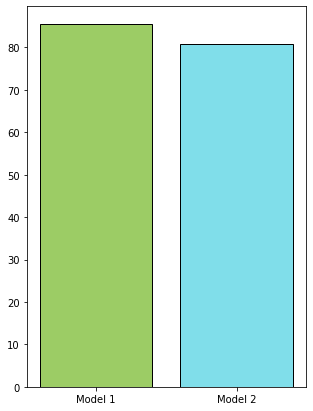

In [58]:
plt.figure(figsize=(5,7))
a = [sc1, sc2]
b = np.arange(len(a))
names = ['Model 1','Model 2']
plt.bar(b,a, color = [ '#9CCC65', '#80DEEA'], edgecolor='black')
plt.xticks(b,names)

plt.show()